N.B.: BWNT is not freely distributable, so not included in this repo.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gensim
import cPickle as pickle
import editdistance
import csv

In [4]:
import plotly.plotly as ply
import plotly.graph_objs as plgo

In [5]:
shico_dn = '/home/patrick/projects/ShiCo Sprint/'

In [6]:
m1 = model_1950_10y = gensim.models.Word2Vec.load_word2vec_format(shico_dn + '1950_1959.w2v',
                                                                  fvocab=shico_dn + '1950_1959.vocab.w2v',
                                                                  binary=True)
m2 = model_1951_10y = gensim.models.Word2Vec.load_word2vec_format(shico_dn + '1951_1960.w2v',
                                                                  fvocab=shico_dn + '1951_1960.vocab.w2v',
                                                                  binary=True)

In [7]:
len(model_1950_10y.vocab), len(model_1951_10y.vocab)

(692536, 749216)

In [8]:
count1 = {key: val.count for key, val in m1.vocab.iteritems()}
count2 = {key: val.count for key, val in m2.vocab.iteritems()}

In [9]:
vocab_count_sorted1 = sorted(count1, key=count1.get, reverse=True)
vocab_count_sorted2 = sorted(count2, key=count2.get, reverse=True)

In [10]:
count_list1 = [count for word, count in count1.iteritems()]
count_list2 = [count for word, count in count2.iteritems()]

In [11]:
np.sum(count_list1), np.sum(count_list2)

(355987241, 390568219)

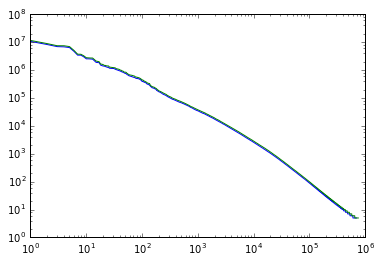

In [12]:
plt.loglog(sorted(count_list1, reverse=True))
plt.loglog(sorted(count_list2, reverse=True))

In [13]:
vocab_combined = list(set(model_1950_10y.vocab.keys()).union(set(model_1951_10y.vocab.keys())))

In [14]:
count_combined = []
for w in vocab_combined:
    try:
        c1 = m1.vocab[w].count
    except KeyError:
        c1 = 0
    try:
        c2 = m2.vocab[w].count
    except KeyError:
        c2 = 0
    count_combined.append(c1 + c2)

In [15]:
vocab_comb_sort = [x for y, x in sorted(zip(count_combined, vocab_combined), reverse=True)]
count_comb_sort = sorted(count_combined, reverse=True)

In [16]:
p_word_comb_sort = np.array(count_comb_sort) / float(np.sum(count_comb_sort))

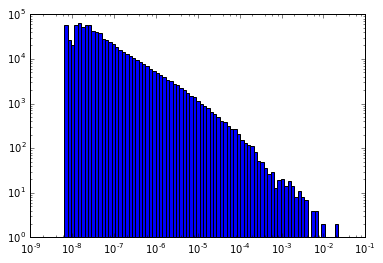

In [190]:
x_bins = np.logspace(np.floor(np.log10(p_word_comb_sort.min())),
                     np.ceil(np.log10(p_word_comb_sort.max())),
                     100)
_ = plt.hist(p_word_comb_sort, bins=x_bins, log=True)
plt.xscale('log')

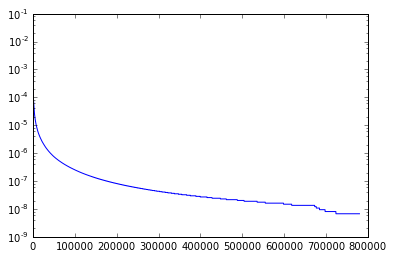

In [193]:
plt.semilogy(p_word_comb_sort)

In [17]:
N_val_words = 1000

In [18]:
val_words = list(np.random.choice(vocab_comb_sort, size=N_val_words, replace=False, p=p_word_comb_sort))

In [19]:
topN_sim = 50

In [20]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / float(len(set1.union(set2)))

In [21]:
p_word_comb_sort_dict = dict(zip(vocab_comb_sort, p_word_comb_sort))

In [22]:
# val_p = []
# val_jaccard = []
# for val_word in val_words:
#     val_p.append(p_word_comb_sort_dict[val_word])

#     try:
#         sim_words1 = [word for word, _ in m1.most_similar(val_word, topn=topN_sim)]
#         sim_words2 = [word for word, _ in m2.most_similar(val_word, topn=topN_sim)]
#         val_jaccard.append(jaccard_similarity(set(sim_words1), set(sim_words2)))
#     except KeyError:
#         val_jaccard.append(0.)

val_p = pickle.load(open('probval2_data/val_p_top50_1000words.pickle', 'r'))
val_words = pickle.load(open('probval2_data/val_words_top50_1000words.pickle', 'r'))
val_jaccard = pickle.load(open('probval2_data/val_jaccard_top50_1000words.pickle', 'r'))

In [26]:
# pickle.dump(val_p, open('probval2_data/val_p_top50_1000words.pickle', 'w'), protocol=2)
# pickle.dump(val_words, open('probval2_data/val_words_top50_1000words.pickle', 'w'), protocol=2)
# pickle.dump(val_jaccard, open('probval2_data/val_jaccard_top50_1000words.pickle', 'w'), protocol=2)

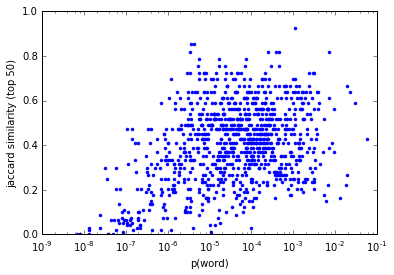

In [23]:
plt.semilogx(val_p, val_jaccard, '.')
plt.xlabel('p(word)')
plt.ylabel('jaccard similarity (top 50)')

In [24]:
trace0 = plgo.Scatter(
  x=val_p,
  y=val_jaccard,
  text=val_words,
  mode="markers"
)
# trace1 = plgo.Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = plgo.Data([trace0,])#, trace1])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')

In [25]:
m1.most_similar('zijn')

[(u'z\xfcn', 0.8560155034065247),
 (u'zrjn', 0.8366921544075012),
 (u'zyn', 0.8275719881057739),
 (u'zjjn', 0.7892638444900513),
 (u'ziin', 0.7694714665412903),
 (u'ztjn', 0.7418159246444702),
 (u'zun', 0.7395227551460266),
 (u'zfln', 0.7272780537605286),
 (u'znn', 0.7247384190559387),
 (u'zqn', 0.6712801456451416)]

In [26]:
m1.vocab['zijn'].count / float(np.sum(count_list1)) / (m1.vocab['zrjn'].count / float(np.sum(count_list1)))

330.3362508164598

In [27]:
m1.most_similar('soestdijk')

[(u'soestd\xfck', 0.5641106963157654),
 (u'socstdijk', 0.5477716326713562),
 (u'soestdiik', 0.5407779216766357),
 (u'soestdjjk', 0.5311074256896973),
 (u'sommelsdijk', 0.5250560641288757),
 (u'soestdrjk', 0.5139874815940857),
 (u'sloterdijk', 0.512660801410675),
 (u'laeken', 0.5081022381782532),
 (u'soestdyk', 0.4955380856990814),
 (u'malacanan', 0.49514538049697876)]

In [28]:
m1.vocab['zijn'].count / m1.vocab['soestdijk'].count

779

# Dictionary filter
Filter out everything that is not in the (BWNT05) dictionary.

In [29]:
dictionary_words = []
with open(shico_dn + 'BWNT05_3.0.1/BWNT05_v003.txt', 'rb') as csvfile:
    dictreader = csv.reader(csvfile, delimiter=';')
    for row in dictreader:
        dictionary_words.append(row[3])

In [30]:
word_comb_dictfilt = list(set(vocab_comb_sort).intersection(dictionary_words))

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:1: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



In [31]:
len(word_comb_dictfilt)

68056

In [32]:
p_word_comb_dictfilt_dict = {word: p_word_comb_sort_dict[word] for word in word_comb_dictfilt}

In [33]:
norm = sum(p for p in p_word_comb_dictfilt_dict.values())
p_word_comb_dictfilt_dict = {word: p/norm for word, p in p_word_comb_dictfilt_dict.iteritems()}

In [34]:
p_word_comb_dictfilt = [p_word_comb_dictfilt_dict[w] for w in word_comb_dictfilt]

In [35]:
sum(p for p in p_word_comb_dictfilt)

1.0000000000000113

In [36]:
val_words_dictfilt = list(np.random.choice(word_comb_dictfilt, size=N_val_words, replace=False, p=p_word_comb_dictfilt))

In [37]:
N_max_expected_crap = 50

In [39]:
# val_p_dictfilt = []
# val_jaccard_dictfilt = []
# for val_word in val_words_dictfilt:
#     val_p_dictfilt.append(p_word_comb_dictfilt_dict[val_word])

#     try:
#         sim1 = {w: s for w, s in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap)}
#         sim2 = {w: s for w, s in m2.most_similar(val_word, topn=topN_sim + N_max_expected_crap)}
#         sim_words1 = set(sim1.keys()).intersection(dictionary_words)
#         sim_words1_dictfilt_dict = {w: sim1[w] for w in sim_words1}
#         sim_words1_dictfilt = sorted(sim_words1_dictfilt_dict.keys(), key=sim_words1_dictfilt_dict.get)[:topN_sim]
#         sim_words2 = set(sim2.keys()).intersection(dictionary_words)
#         sim_words2_dictfilt_dict = {w: sim2[w] for w in sim_words2}
#         sim_words2_dictfilt = sorted(sim_words2_dictfilt_dict.keys(), key=sim_words2_dictfilt_dict.get)[:topN_sim]
#         val_jaccard_dictfilt.append(jaccard_similarity(set(sim_words1_dictfilt), set(sim_words2_dictfilt)))
#     except KeyError:
#         val_jaccard_dictfilt.append(0.)
#     except ZeroDivisionError:
#         val_jaccard_dictfilt.append(0.)

In [40]:
val_p_dictfilt = pickle.load(open('probval2_data/val_p_dictfilt_top50_1000words.pickle', 'r'))
val_words_dictfilt = pickle.load(open('probval2_data/val_words_dictfilt_top50_1000words.pickle', 'r'))
val_jaccard_dictfilt = pickle.load(open('probval2_data/val_jaccard_dictfilt_top50_1000words.pickle', 'r'))

In [88]:
# pickle.dump(val_p_dictfilt, open('probval2_data/val_p_dictfilt_top50_1000words.pickle', 'w'), protocol=2)
# pickle.dump(val_words_dictfilt, open('probval2_data/val_words_dictfilt_top50_1000words.pickle', 'w'), protocol=2)
# pickle.dump(val_jaccard_dictfilt, open('probval2_data/val_jaccard_dictfilt_top50_1000words.pickle', 'w'), protocol=2)

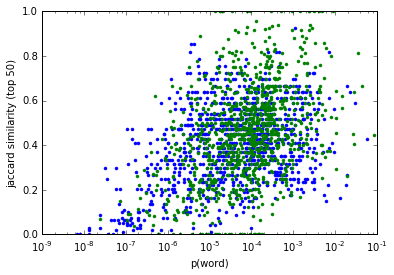

In [41]:
plt.semilogx(val_p, val_jaccard, '.b')
plt.semilogx(val_p_dictfilt, val_jaccard_dictfilt, '.g')
plt.xlabel('p(word)')
plt.ylabel('jaccard similarity (top 50)')

In [42]:
def plot_hist2d(x, y, bins, ax=None, xmin=None, xmax=None):
    if xmin is None:
        xmin = min(x)
    if xmax is None:
        xmax = max(x)
    xbins = 10**np.linspace(np.floor(np.log10(xmin)), np.ceil(np.log10(xmax)), bins)
    ybins = np.linspace(0, 1, bins)

    counts, _, _ = np.histogram2d(y, x, bins=(ybins, xbins))

    if ax is None:
        fig, ax = plt.subplots()

    ax.pcolormesh(xbins, ybins, counts)
    ax.set_xscale('log')
    
#     y_bin = (ybins[1:] + ybins[:-1]) / 2.
#     y_weight = np.nan_to_num(counts / counts.sum(axis=0))
#     y_mean = np.sum(y_bin[:,None] * y_weight, axis=0)
# #     y_std = counts.std(axis=0)
    x_bin = 10**((np.log10(xbins[1:]) + np.log10(xbins[:-1]))/2.)
    
    xy_binned_by_x = {ix: [] for ix in range(len(xbins)-1)}
    for ix in range(len(x)):
        xy_binned_by_x[xbins.searchsorted(x[ix])-1].append((x[ix], y[ix]))
    xy_binned_by_x = {ix: np.array(ding) for ix, ding in xy_binned_by_x.iteritems()}
    
    x_plot = []
    y_plot = []
    yerr_plot = []
    for ix in range(len(xbins)-1):
        if len(xy_binned_by_x[ix]) > 0:
            x_plot.append(x_bin[ix])
            y_plot.append(xy_binned_by_x[ix][:,1].mean())
            yerr_plot.append(xy_binned_by_x[ix][:,1].std())
    
    ax.errorbar(x_plot, y_plot, yerr=yerr_plot)
    
    ax.set_ylim(0, 1)
        
    return xmin, xmax, counts

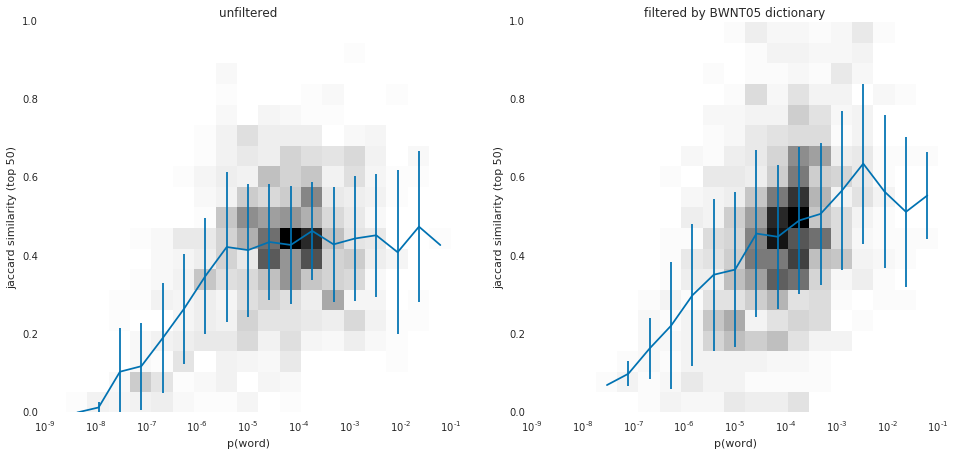

In [43]:
Nbins = 20
with plt.style.context(['seaborn-notebook', 'seaborn-darkgrid', 'seaborn-colorblind']):
    fig, ax = plt.subplots(1, 2, figsize=(16,7))
    xmin, xmax, c = plot_hist2d(val_p, val_jaccard, Nbins, ax=ax[0])
    ax[0].set_xlabel('p(word)')
    ax[0].set_ylabel('jaccard similarity (top 50)')
    ax[0].set_title('unfiltered')
    _, _, _ = plot_hist2d(val_p_dictfilt, val_jaccard_dictfilt, Nbins, ax=ax[1], xmin=xmin, xmax=xmax)
    ax[1].set_title('filtered by BWNT05 dictionary')
    ax[1].set_xlabel('p(word)')
    ax[1].set_ylabel('jaccard similarity (top 50)')

In [44]:
print np.mean(val_jaccard), np.std(val_jaccard)
print np.mean(val_jaccard_dictfilt), np.std(val_jaccard_dictfilt)

0.408348327981 0.172392256727
0.456827772499 0.211101561948


In [45]:
trace0 = plgo.Scatter(
  x=val_p_dictfilt,
  y=val_jaccard_dictfilt,
  text=val_words_dictfilt,
  mode="markers"
)
trace1 = plgo.Scatter(
  x=val_p,
  y=val_jaccard,
  text=val_words,
  mode="markers"
)
data = plgo.Data([trace0, trace1])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')

In [46]:
(set(dict(m1.most_similar('het', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words), 
set(dict(m2.most_similar('het', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words))

({'bovengenoemd',
  'dit',
  'een',
  'eerstgenoemd',
  'hef',
  'hei',
  'hel',
  'hit',
  'hot',
  'hst',
  'iet',
  'laatstgenoemd',
  'tiet',
  'tweehoofdig'},
 {'bovengenoemd',
  'dit',
  'ditzelfde',
  'een',
  'eerstgenoemd',
  'hef',
  'hei',
  'hel',
  'hit',
  'hot',
  'hst',
  'iet',
  'laatstgenoemd',
  'meergenoemd',
  'tiet'})

In [47]:
set(dict(m1.most_similar('minister', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words)

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:1: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



{'ambtgenoot',
 'bewindsman',
 'departement',
 'luns',
 'ministerie',
 'onderminister',
 'staatssecretaris',
 'viceminister'}

In [48]:
set(dict(m1.most_similar('maandag', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words)

{'april',
 'augustus',
 'december',
 'dinsdag',
 'dinsdagavond',
 'dinsdagmiddag',
 'dinsdagmorgen',
 'dinsdagochtend',
 'donderdag',
 'donderdagavond',
 'donderdagmiddag',
 'donderdagmorgen',
 'donderdagochtend',
 'februari',
 'gisteren',
 'januari',
 'jongstleden',
 'juli',
 'juni',
 'maandagavond',
 'maandagmiddag',
 'maandagmorgen',
 'maandagochtend',
 'maart',
 'mei',
 'nieuwjaarsdag',
 'november',
 'oktober',
 'oudejaarsdag',
 'september',
 'vandaag',
 'vrijdag',
 'vrijdagavond',
 'vrijdagmiddag',
 'vrijdagmorgen',
 'vrijdagochtend',
 'woensdag',
 'woensdagavond',
 'woensdagmiddag',
 'woensdagmorgen',
 'woensdagochtend',
 'zaterdag',
 'zaterdagavond',
 'zaterdagmiddag',
 'zaterdagmorgen',
 'zaterdagochtend',
 'zondag',
 'zondagavond',
 'zondagmiddag',
 'zondagmorgen',
 'zondagochtend'}

In [49]:
m1.most_similar('minister', topn=topN_sim+N_max_expected_crap)

[(u'minisier', 0.7716935873031616),
 (u'minist\xe9r', 0.7338584065437317),
 (u'staatssecretaris', 0.7304750680923462),
 (u'ministei', 0.7206040620803833),
 (u'oudminister', 0.701644778251648),
 (u'minster', 0.688407301902771),
 (u'nister', 0.6845920085906982),
 (u'ministervan', 0.6802278161048889),
 (u'ministers', 0.6520008444786072),
 (u'ministor', 0.6430771946907043),
 (u'ninister', 0.6364973783493042),
 (u'ministerie', 0.632993757724762),
 (u'spinoy', 0.6291888356208801),
 (u'mnister', 0.6266401410102844),
 (u'ministe', 0.6201404333114624),
 (u'mlnister', 0.6148898005485535),
 (u'viceminister', 0.6142911314964294),
 (u'kvpminister', 0.6137517690658569),
 (u'ministar', 0.6114950180053711),
 (u'minis', 0.607969343662262),
 (u'ministet', 0.6034566760063171),
 (u'bewindsman', 0.6017476320266724),
 (u'financi\xebn', 0.6005555987358093),
 (u'ministerpresident', 0.5964834094047546),
 (u'zakenn', 0.596211850643158),
 (u'mmister', 0.5961301922798157),
 (u'jinister', 0.5951021313667297),
 (u'

# Levenshtein filter
We filter by distance 2 or 3; this also takes into account many vervoegingen (e.g. most verbs with 2 and also most singular vs plural with 3).

In [50]:
editdistance.eval('hello', 'hullo')

1L

In [62]:
lev_gt_2 = lambda w1, w2: editdistance.eval(w1, w2) > 2
lev_gt_3 = lambda w1, w2: editdistance.eval(w1, w2) > 3

In [64]:
# val_p_lev2filt = []
# val_jaccard_lev2filt = []
# for val_word in val_words:
#     val_p_lev2filt.append(p_word_comb_sort_dict[val_word])

#     try:
#         sim_words1 = [word for word, _ in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if lev_gt_2(val_word, word)]
#         sim_words2 = [word for word, _ in m2.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if lev_gt_2(val_word, word)]
#         val_jaccard_lev2filt.append(jaccard_similarity(set(sim_words1), set(sim_words2)))
#     except KeyError:
#         val_jaccard_lev2filt.append(0.)

In [65]:
# pickle.dump(val_p_lev2filt, open('probval2_data/val_p_lev2filt_top50_1000words.pickle', 'w'), protocol=2)
# pickle.dump(val_jaccard_lev2filt, open('probval2_data/val_jaccard_lev2filt_top50_1000words.pickle', 'w'), protocol=2)

In [55]:
val_p_lev2filt = pickle.load(open('probval2_data/val_p_lev2filt_top50_1000words.pickle', 'r'))
val_jaccard_lev2filt = pickle.load(open('probval2_data/val_jaccard_lev2filt_top50_1000words.pickle', 'r'))

In [67]:
# val_p_lev3filt = []
# val_jaccard_lev3filt = []
# for val_word in val_words:
#     val_p_lev3filt.append(p_word_comb_sort_dict[val_word])

#     try:
#         sim_words1 = [word for word, _ in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if lev_gt_3(val_word, word)]
#         sim_words2 = [word for word, _ in m2.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if lev_gt_3(val_word, word)]
#         val_jaccard_lev3filt.append(jaccard_similarity(set(sim_words1), set(sim_words2)))
#     except KeyError:
#         val_jaccard_lev3filt.append(0.)
#     except ZeroDivisionError:
#         val_jaccard_lev3filt.append(0.)

In [68]:
# pickle.dump(val_p_lev3filt, open('probval2_data/val_p_lev3filt_top50_1000words.pickle', 'w'), protocol=2)
# pickle.dump(val_jaccard_lev3filt, open('probval2_data/val_jaccard_lev3filt_top50_1000words.pickle', 'w'), protocol=2)

In [55]:
val_p_lev3filt = pickle.load(open('probval2_data/val_p_lev3filt_top50_1000words.pickle', 'r'))
val_jaccard_lev3filt = pickle.load(open('probval2_data/val_jaccard_lev3filt_top50_1000words.pickle', 'r'))

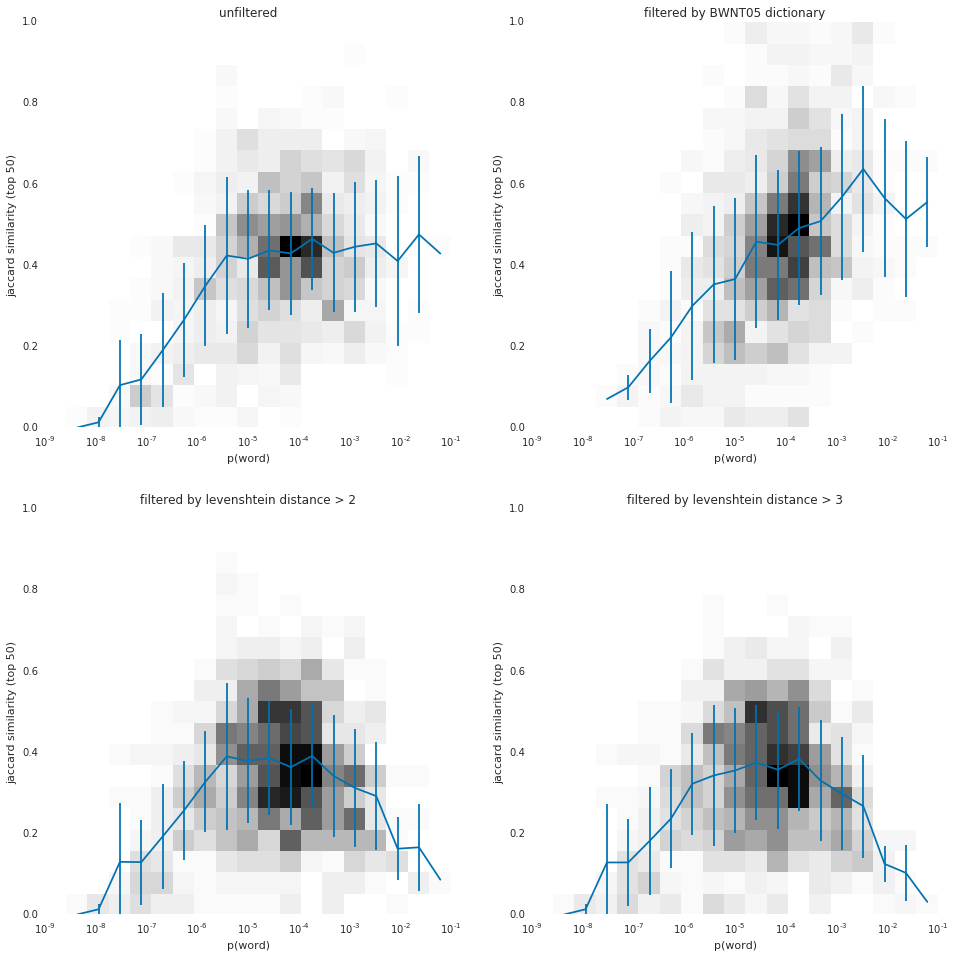

In [69]:
Nbins = 20
with plt.style.context(['seaborn-notebook', 'seaborn-darkgrid', 'seaborn-colorblind']):
    fig, ax = plt.subplots(2, 2, figsize=(16,16))
    xmin, xmax, c = plot_hist2d(val_p, val_jaccard, Nbins, ax=ax[0,0])
    ax[0,0].set_xlabel('p(word)')
    ax[0,0].set_ylabel('jaccard similarity (top 50)')
    ax[0,0].set_title('unfiltered')
    _, _, _ = plot_hist2d(val_p_dictfilt, val_jaccard_dictfilt, Nbins, ax=ax[0,1], xmin=xmin, xmax=xmax)
    ax[0,1].set_title('filtered by BWNT05 dictionary')
    ax[0,1].set_xlabel('p(word)')
    ax[0,1].set_ylabel('jaccard similarity (top 50)')
    _, _, _ = plot_hist2d(val_p_lev2filt, val_jaccard_lev2filt, Nbins, ax=ax[1,0], xmin=xmin, xmax=xmax)
    ax[1,0].set_title('filtered by levenshtein distance > 2')
    ax[1,0].set_xlabel('p(word)')
    ax[1,0].set_ylabel('jaccard similarity (top 50)')
    _, _, _ = plot_hist2d(val_p_lev3filt, val_jaccard_lev3filt, Nbins, ax=ax[1,1], xmin=xmin, xmax=xmax)
    ax[1,1].set_title('filtered by levenshtein distance > 3')
    ax[1,1].set_xlabel('p(word)')
    ax[1,1].set_ylabel('jaccard similarity (top 50)')

In [70]:
trace0 = plgo.Scatter(
  x=val_p_lev2filt,
  y=val_jaccard_lev2filt,
  text=val_words,
  mode="markers"
)
data = plgo.Data([trace0])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')

In [223]:
lev2filt_words_m1 = lambda val_word: [word for word, _ in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if lev_gt_2(val_word, word)]
dictfilt_words_m1 = lambda val_word: [word for word, _ in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if word in dictionary_words]
lev2anddictfilt_words_m1 = lambda val_word: [word for word, _ in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if word in dictionary_words and lev_gt_2(val_word, word)]
lev2_and_dict_and_freq100_filt_words_m1 = lambda val_word: [word for word, _ in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap) if word in dictionary_words and lev_gt_2(val_word, word) and m1.vocab[word].count > 100]

In [224]:
print lev2filt_words_m1('het')
print
print dictfilt_words_m1('het')
print
print lev2anddictfilt_words_m1('het')
print
print lev2_and_dict_and_freq100_filt_words_m1('het')

[u'vanhet', u'li\xe9t', u'aanhet', u'bovengenoemd', u'ilct', u'olijks', u'eennieuw', u'eerstgenoemd', u'jict', u'tweehoofdig', u'laatstgenoemd', u'franstalig', u'ieind', u'iict', u'dergehjk', u'blanshards', u'dierenziekten', u'analphabetisch', u'burgemeesterlijk', u'idit', u'dergel\xfck', u'jlct', u'vierpunten', u'onzelfgenoegzaamheid', u'tegenhet', u'nagoeibs', u'\xe8lk', u'praehistorisch', u'toezichthebbend']

[u'hef', u'hei', u'tiet', u'hel', u'hst', u'hot', u'dit', u'iet', u'bovengenoemd', u'eerstgenoemd', u'tweehoofdig', u'laatstgenoemd', u'hit', u'een']



/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:2: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



[u'bovengenoemd', u'eerstgenoemd', u'tweehoofdig', u'laatstgenoemd']

[u'bovengenoemd', u'eerstgenoemd', u'laatstgenoemd']


/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:4: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



In [225]:
print lev2anddictfilt_words_m1('de')
print
print lev2filt_words_m1('de')
print
print lev2_and_dict_and_freq100_filt_words_m1('de')

[u'tic', u'van', u'eilandbestuur']

[u'cic', u'tic', u'clc', u'van', u'eilandbestuur', u'farouks', u'antilliaanse', u'hariono', u'tschumie', u'lacis', u'priemier', u'djojohadiredjo', u'inzon', u'opd\xeb', u'xedcrlandsc', u'iruanse', u'brazilii\xeb', u'surowijono', u'landsregelingen', u'landso', u'lacl\xe9', u'wapenstilstandsovereen', u'yemense', u'dewev', u'cfcn', u'independiente', u'delievende', u'skjoeld', u'indoresische', u'caraibisch\xeb', u'zaghlul', u'harrinian', u'prostitutieprobleem', u'correia', u'arubaanse', u'uiterlij', u'vande', u'echandi', u'terao', u'struyckens', u'brazilliaanse', u'\xe8enf', u'dooide', u'gebiuikt', u'seheime', u'goeile', u'hucleman', u'curagaose', u'doorde', u'arevalo', u'shiro', u'overde', u'huvellc', u'commissi\xe9', u'ploch']

[u'tic', u'van']


/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:4: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



In [227]:
m1.vocab['tic'].count

6164

In [214]:
len([thing for thing in m1.vocab.values() if thing.count > 100]), len(dictionary_words)

(692536, 114109)

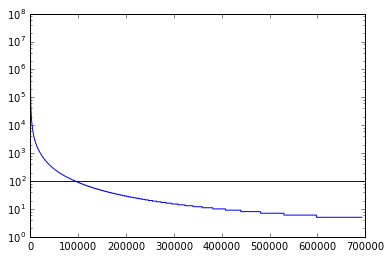

In [222]:
plt.semilogy(sorted(count_list1, reverse=True))
plt.axhline(100)

In [197]:
print lev2anddictfilt_words_m1('van')

[u'de', u'volkscommissariaat']


/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



In [80]:
lev2filt_words_m1('oorlog')

[u'bevrijding',
 u'wereldoorlog',
 u'oorlogsjaren',
 u'hongerwinter',
 u'bevr\xfcding',
 u'burgeroorlog',
 u'bezettingsjaren',
 u'bezetting',
 u'capitulatie',
 u'soevereiniteitsoverdracht',
 u'bevrijdingsoorlog',
 u'1945',
 u'souvereiniteitsoverdracht',
 u'crisisjaren',
 u'machtsovername',
 u'mandaatsperiode',
 u'boerenoorlog',
 u'verwoesting',
 u'suezcrisis',
 u'meidagen',
 u'\xf6orlogse',
 u'ooriogse',
 u'revolutiejaren',
 u'februariramp',
 u'machtsoverneming',
 u'wereldbrand',
 u'bevryding',
 u'sina\xefveldtocht',
 u'verzetsroman',
 u'vrijheidsoorlog',
 u'stormramp',
 u'1940',
 u'bloedigste',
 u'hevigste',
 u'wereldcrisis',
 u'schietparty',
 u'bezettingstijd',
 u'catastrofe',
 u'souverciniteitsoverdracht',
 u'veldtocht',
 u'dingisten',
 u'anschlusz',
 u'00r10g',
 u'wereldooilog',
 u'pogroms',
 u'kerkstrijd',
 u'geldsanering',
 u'droogteperiode',
 u'\xf3orlogse',
 u'wereldoorlogen',
 u'revolutie',
 u'uitmergelende',
 u'oorlogsdagen',
 u'hitler',
 u'catastrophe',
 u'ineenstorting',
 u

# Prutsing with inverse projection method

In [84]:
f = np.linalg.pinv(m1.syn0norm)

In [91]:
proj_inv_oorlog = np.dot(f.T, m1['oorlog'])

In [93]:
proj_inv_oorlog[m1.vocab['oorlog'].index], proj_inv_oorlog.max()

(0.00075302616, 0.00075302616)

In [94]:
ix_sort = np.argsort(proj_inv_oorlog)

In [97]:
print [m1.index2word[ix] for ix in ix_sort[:10]]
print
print [m1.index2word[ix] for ix in ix_sort[-10:]]

[u'paolucci', u'landbouwver', u'xeer', u'sal', u'aanvangen', u'ondervond', u'touwde', u'artde', u'behelst', u'memorerende']

[u'bevr\xfcding', u'oorlogen', u'ooriog', u'bezetting', u'pauze', u'oorlogsjaren', u'oorlogse', u'wereldoorlog', u'bevrijding', u'oorlog']


In [98]:
def words_from_inv_proj(word):
    proj_inv_word = np.dot(f.T, m1[word])
    ix_sort = np.argsort(proj_inv_word)
    print [m1.index2word[ix] for ix in ix_sort[:10]]
    print
    print [m1.index2word[ix] for ix in ix_sort[-10:]]

In [101]:
words_from_inv_proj('vrede')

[u'legt', u'tellende', u'waarmed', u'yaffa', u'levie', u'critisch', u'hubacher', u'ehaam', u'voornoemden', u'ambtenaarl']

[u'welvaart', u'rechtvaardigheid', u'wapenstilstand', u'gelijkheid', u'voorspoed', u'gerechtigheid', u'veiligheid', u'vrijheid', u'wereldvrede', u'vrede']


In [102]:
words_from_inv_proj('wapenstilstand')

[u'tellende', u'djakartase', u'bolivai', u'iading', u'staa', u'opneemt', u'gereserveerde', u'stedelijke', u'onbekendheid', u'raden']

[u'bestandsovereenkomst', u'wapenstilstandsonderhandelingen', u'compromis', u'wapenstilstandsovereenkomst', u'vrede', u'korea', u'vijandelijkheden', u'wapenstilstandsbesprekingen', u'bestand', u'wapenstilstand']


In [103]:
words_from_inv_proj('bert')

[u'correspondentie', u'verge', u'kattensingel', u'viscose', u'fabrieks', u'260728', u'luikt', u'afri', u'ijzeren', u'superconnies']

[u'jan', u'garthoff', u'henk', u'haanstra', u'oekomen', u'garthof', u'hans', u'wim', u'onnes', u'bert']


In [105]:
words_from_inv_proj('appels')

[u'gedempte', u'deelnaden', u'huizum', u'verloren1', u'aeren', u'major', u'ingehouden', u'uverige', u'jacob', u'dljzonder']

[u'sla', u'wortelen', u'perziken', u'kersen', u'tomaten', u'uien', u'pruimen', u'appelen', u'peren', u'appels']


In [106]:
words_from_inv_proj('het')

[u'ltrok', u'sowjetregime', u'schoonebeekveld', u'krotenkokersbedrijf', u'weerlichtte', u'westerkerkkoor', u'dolore', u'vraagprogramma', u'spanningsverschil', u'lampenisten']

[u'bet', u'hst', u'ihet', u'hel', u'tiet', u'h\xe8t', u'hef', u'hei', u'h\xe9t', u'het']


In [107]:
words_from_inv_proj('hst')

[u'pelsdier', u'lampenisten', u'bandelaren', u'regreing', u'oonnen', u'zakentarief', u'vaae', u'reichsfront', u'wablief', u'wijbrandts']

[u'hrt', u'h\xe8t', u'bet', u'het', u'tiet', u'hef', u'hel', u'h\xe9t', u'hei', u'hst']


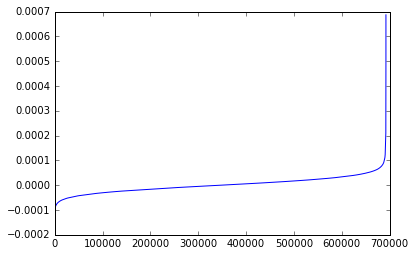

In [112]:
plt.plot(sorted(np.dot(f.T, m1['appels'])))

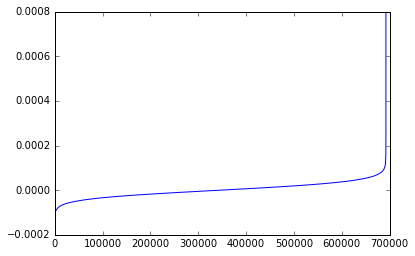

In [113]:
plt.plot(sorted(np.dot(f.T, m1['bert'])))

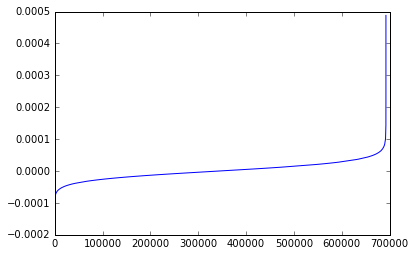

In [114]:
plt.plot(sorted(np.dot(f.T, m1['tegels'])))

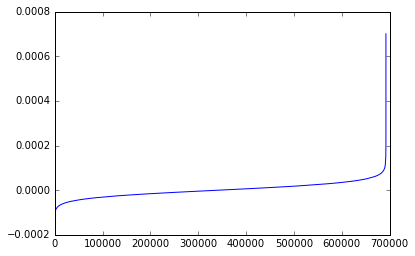

In [115]:
plt.plot(sorted(np.dot(f.T, m1['verkiezing'])))

In [123]:
verkiezing = np.dot(f.T, m1['verkiezing'])

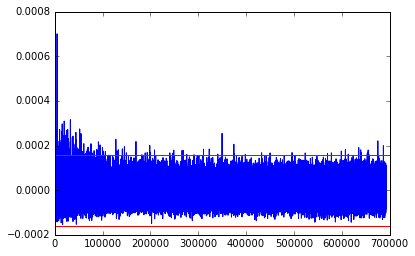

In [137]:
plt.plot(verkiezing)
plt.axhline(5*verkiezing.std(), color='r')
plt.axhline(-5*verkiezing.std(), color='r')

In [144]:
ix_verkiezing_gt5std = np.where(verkiezing > 5*verkiezing.std())
print [m1.index2word[ix] for ix in ix_verkiezing_gt5std[0]]

In [167]:
ding = np.dot(f.T, m1['fijn'])
ix_ding_gt5std = np.where(ding > 5*ding.std())
ix_ding_gt5std_sorted = sorted(ix_ding_gt5std[0], key={ix: ding[ix] for ix in ix_ding_gt5std[0]}.get)
print [m1.index2word[ix] for ix in ix_ding_gt5std_sorted][::-1][:50]

[u'fijn', u'leuk', u'mooi', u'heerlijk', u'aardig', u'prettig', u'plezierig', u'prachtig', u'goed', u'knap', u'geraffineerd', u'lekker', u'verrukkelijk', u'subtiel', u'schitterend', u'rauw', u'grappig', u'fijne', u'vervelend', u'uitstekend', u'raar', u'scherp', u'blij', u'voortreffelijk', u'ruw', u'zielig', u'eigenaardig', u'kostelijk', u'jammer', u'meesterlijk', u'na\xefef', u'gemakkelijk', u'dwergmuisjes', u'aanlokkelijk', u'benieuwd', u'lief', u'fascinerend', u'voorzichtig', u'afschuwelijk', u'uitnemend', u'fris', u'zoet', u'dom', u'handig', u'heterogeen', u'simpel', u'fraai', u'onplezierig', u'lelijk', u'braaf']


In [153]:
print zip(*m1.most_similar('fijn', topn=50))[0]

(u'mooi', u'heerlijk', u'leuk', u'verrukkelijk', u'lekker', u'smakeloos', u'grappig', u'schattig', u'fijne', u'gesnipperd', u'f\xfcn', u'aardig', u'fijngehakt', u'smeu\xefg', u'heeriyk', u'zoetzure', u'mollig', u'rauw', u'beeldig', u'knapperig', u'geurig', u'zielig', u'vervelend', u'snoezig', u'rolrond', u'heerl\xfck', u'aandoenlijk', u'radijsjes', u'croquant', u'voedzaam', u'mespuntje', u'moscovisch', u'zadeltje', u'uitgeknepen', u'doppertjes', u'biefstukje', u'vlakgom', u'levertjes', u'vlierthee', u'koddig', u'sappig', u'proza\xefsch', u'besuikerd', u'geparfumeerd', u'reepje', u'smakelijk', u'lollig', u'stompzinnig', u'smerig', u'verwaand')


In [155]:
set([m1.index2word[ix] for ix in ix_ding_gt5std[0]][:50]).intersection(zip(*m1.most_similar('fijn', topn=50))[0])

{u'aardig', u'fijne', u'heerlijk', u'lekker', u'leuk', u'mooi'}

In [169]:
print zip(*m1.most_similar('vetzucht', topn=50))[0]

(u'aderverkalking', u'waterzucht', u'hypofyse', u'doofheid', u'hartkwalen', u'haaruitval', u'zenuwweefsel', u'stofwisseling', u'verkalking', u'bloedarmoede', u'vaatkrampen', u'pellagra', u'maagzweren', u'eczeem', u'misvormingen', u'caries', u'vitaminetekort', u'doofstomheid', u'vervorming', u'diarrhee', u'suikerziekte', u'maagaandoeningen', u'nierontsteking', u'aandoeningen', u'prikkelbaarheid', u'onderbetaling', u'bloeddruk', u'vaatwand', u'hormonale', u'spijsverteringsorganen', u'verlammingen', u'geestesziekten', u'kortademigheid', u'tuberkelbacil', u'ischias', u'epilepsie', u'hypertensie', u'rheumatiek', u'netelroos', u'migraine', u'vervormingen', u'misvorming', u'bedwateren', u'etterbacterie', u'geestesziekte', u'schildklier', u'allergische', u'infectieziekten', u'overbelichting', u'virussoort')


In [172]:
print zip(*m1.most_similar('framboos', topn=50))[0]

(u'bowa', u'gedopte', u'boutb', u'contoil', u'boetne', u'357a', u'uetaa', u'middelgrof', u'paait', u'keilden', u'patengao', u'britamou', u'moutot', u'cnna', u'joneaal', u'raamscherm', u'armrost', u'laurierbladen', u'goodv', u'8140', u'vooitl', u'knfdm', u'6817', u'3538', u'stokvl', u'4t9', u'gctas', u'centx', u'vltaa', u'btso', u'0152', u'cmh', u'z5o', u'oooa', u'oogstkers', u'patengar', u'panaheotan', u'loee', u'gillettecv', u'inflon', u'fruehernte', u'contl', u'televxlec', u'oomm', u'handelsondern', u'3674', u'quakei', u'uzet', u'rttv', u'kattenland')


In [175]:
print zip(*m1.most_similar('verdraaid', topn=50))[0]

(u'verduiveld', u'verdomd', u'opschepperig', u'allemachtig', u'bedonderd', u'verdomme', u'lollig', u'toelijken', u'verhole', u'kindlief', u'\xe8rg', u'verduveld', u'begr\xfcp', u'verzin', u'onuitstaanbaar', u'verschrikkelijk', u'mqar', u'knoeierig', u'kleinzielig', u'eerlyk', u'eerhjk', u'h00r', u'verwaand', u'humeurig', u'onbeschoft', u'eerl\xfck', u'badoet', u'bliksems', u'stapelgek', u'tvtee', u'voorgelogen', u'geduimd', u'vreselijk', u'kortademig', u'akelig', u'vergeetachtig', u'flauwekul', u'nietwaar', u'stukkie', u'schijnheilig', u'smeuiig', u'huichelde', u'kamillenthee', u'\xe9rg', u'beetjel', u'eeriyk', u'hatelijk', u'naampje', u'schryf', u'allemaal')


In [177]:
print zip(*m1.most_similar('pijpestelen', topn=50))[0]

(u'pijpenstelen', u'regende', u'hagelde', u'sneeuwde', u'sneeuwt', u'aardedonker', u'pikdonker', u'motregende', u'buiswater', u'druppelt', u'stortregende', u'gutst', u'bliksemde', u'pikkedonker', u'bladstil', u'kolkte', u'plassende', u'sterrenlicht', u'bermgras', u'siepelde', u'schemerdonker', u'halfdonker', u'drupt', u'schuimt', u'lamplicht', u'mistte', u'stortregenen', u'gebons', u'winterzonnetje', u'tochtte', u'stuurhuis', u'winderig', u'dikst', u'bintwerk', u'stikdonker', u'onweerde', u'terugzwemmen', u'zwerk', u'regengordijn', u'strijdrumoer', u'broeierig', u'dolboord', u'klotsend', u'ochtendlicht', u'neerstroomde', u'gebonk', u'rimpelloze', u'kletterde', u'getoeter', u'landwind')


In [178]:
print zip(*m1.most_similar('kerk', topn=50))[0]

(u'nederduits', u'hervormde', u'bonders', u'lutherse', u'vrljgem', u'kerkgebouw', u'slmonstraat', u'kerken', u'pastorie', u'gereformeerde', u'methodistische', u'vrouwendienst', u'episcopale', u'wijbr', u'wolfshoek', u'presbyteriaal', u'schledamsevest', u'paaskerk', u'rehobothkerk', u'schippersraad', u'augustana', u'nederduitse', u'remonstrantse', u'vrijgem', u'volkskerk', u'presbyteriaanse', u'gereformeer', u'strevelswijk', u'staatskerk', u'synodaal', u'zuidwijks', u'ge\xefnstitueerde', u'protestantse', u'herv', u'anglicaanse', u'methodisten', u'kerkdienst', u'teugdraad', u'kevk', u'evangelische', u'heugerstr', u'vernieuwingsbeweging', u'episcopaalse', u'eredienst', u'bondsrichting', u'aelbrechtskolk', u'morgensterkerk', u'llndyer', u'bethelkerk', u'zendingsbond')


In [179]:
print zip(*m1.most_similar('nederduits', topn=50))[0]

(u'bonders', u'presbyteriaal', u'vrouwendienst', u'presbyteriaanse', u'gereformeerde', u'zendingsbond', u'hervormde', u'nederduitse', u'methodistische', u'baptistische', u'congregationalistische', u'gereformeer', u'synodocratische', u'mannenbond', u'schippersraad', u'synodaal', u'kerktype', u'kerk', u'episcopale', u'bondsrichting', u'vrijgemaakte', u'episcopaalse', u'paaskerk', u'lutherse', u'evangelische', u'vernieuwingsbeweging', u'teugdraad', u'diakonie\xebn', u'zendende', u'modaliteitenkerk', u'dogmengeschiedenis', u'zendingscorporaties', u'anglicaanse', u'synodalistisch', u'methodisten', u'protestantse', u'presbyterianen', u'wijbr', u'modaliteit', u'augustana', u'dopperkerk', u'kerken', u'ge\xefnstitueerde', u'doopsgezinde', u'jeugdouderling', u'meisjesverenigingen', u'bouwcorporatie', u'luthersen', u'zendingscommissies', u'rechtzinnige')


In [181]:
print zip(*m1.most_similar('fries', topn=50))[0]

(u'gronings', u'drents', u'reddingbootcomit\xe9', u'friese', u'dialect', u'friesch', u'limburgs', u'indonesisch', u'hollands', u'twents', u'westfries', u'rundveestamboek', u'zuidafrikaans', u'natuurhist', u'natuurh', u'bovenlands', u'paardenstamboek', u'veluws', u'knvbelftal', u'warmbloed', u'maleis', u'italiaans', u'zwartbont', u'reisvalies', u'nederlands', u'literair', u'streektaal', u'drentse', u'leervak', u'beugelsjees', u'javaans', u'voertaal', u'varkensstamboek', u'oostfries', u'volkssanatorium', u'groninger', u'jiddisj', u'handsmeedwerk', u'melkschaap', u'spaans', u'platduits', u'fokprodukt', u'reisvallies', u'spannennummer', u'documentenreproductie', u'stamboek', u'poarteboer', u'sallands', u'mvseum', u'c\xf3stuum')


In [182]:
print zip(*m1.most_similar('java', topn=50))[0]

(u'sumatra', u'borneo', u'bengalen', u'celebes', u'radja', u'ceiebes', u'kalimantan', u'bornco', u'siiinatra', u'lava', u'bantam', u'blitar', u'bengkulu', u'kotabaru', u'riouw', u'kertosono', u'polydorus', u'xnten', u'ternate', u'garoet', u'sibaroet', u'bomeo', u'aeoeng', u'sommelsdyk', u'sumtra', u'poso', u'oobt', u'sumatia', u'jotta', u'snmatra', u'padang', u'ternat\xe9', u'telrestas', u'indrapoera', u'modjokerto', u'ampenon', u'rotti', u'madoera', u'sumatrn', u'sumau', u'talisse', u'sutnatra', u'slamat', u'mataram', u'surrlento', u'singkep', u'cheribon', u'sorang', u'laertes', u'schtedyk')


In [185]:
print zip(*m1.most_similar('python', topn=50))[0]

(u'slungelachtige', u'vangdraden', u'boomtak', u'sliert', u'handkoffertje', u'vadermoorder', u'jachtmes', u'meesleurde', u'slagtanden', u'meisjeshand', u'kanonskogel', u'camouflagejas', u'pyamabroek', u'stierennek', u'vrouwengestalte', u'hangkast', u'bunzing', u'worpjes', u'bontjasje', u'potvis', u'bontcape', u'rookpluim', u'broodmagere', u'bloemenkrans', u'ijsklomp', u'vlechtjes', u'tommygun', u'stuiter', u'broodkorst', u'galabia', u'gaspijp', u'kapperswinkel', u'kwartslag', u'stoppelbaard', u'bloedspoor', u'nachtpon', u'kenniswagen', u'yakhuid', u'paardekop', u'inktpot', u'toegooide', u'ploertendoder', u'ringslang', u'poncho', u'luchtkoker', u'hangsnor', u'huilbui', u'dwarsbalk', u'rugvin', u'gummislang')
